In [1]:

import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

dataset = [['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

   ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']]
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


In [2]:
from mlxtend.frequent_patterns import apriori
apriori(df, min_support=0.6)

,support,itemsets
0,0.6,(2)
1,0.8,(5)
2,0.8,(7)
3,0.6,(9)
4,0.6,"(5, 7)"
5,0.6,"(9, 5)"


In [3]:
frequent_itemsets=apriori(df, min_support=0.6, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


In [4]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8,-0.25
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6,1.00
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf,0.50


In [5]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf,0.5


In [ ]:
                                                  #Bonus

In [1]:

import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

data = pd.read_csv('Market_Basket_Optimisation.csv')
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#découvrir les missing valeus
data.isna().sum()

shrimp                  0
almonds              1754
avocado              3112
vegetables mix       4156
green grapes         4972
whole weat flour     5637
yams                 6132
cottage cheese       6520
energy drink         6847
tomato juice         7106
low fat yogurt       7245
green tea            7347
honey                7414
salad                7454
mineral water        7476
salmon               7493
antioxydant juice    7497
frozen smoothie      7497
spinach              7498
olive oil            7500
dtype: int64

In [3]:
## Data Cleaning step

# replacing empty value with 0.
data.fillna(0,inplace=True)

In [4]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0


In [5]:
data.shape

(7500, 20)

In [6]:
data['olive oil'] = data['olive oil'].astype(int) 


In [47]:
data.head(15)

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,chutney,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,turkey,avocado,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,mineral water,milk,energy bar,whole wheat rice,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,low fat yogurt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,whole wheat pasta,french fries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,soup,light cream,shallot,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,frozen vegetables,spaghetti,green tea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,french fries,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,eggs,pet food,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Data Pre-processing step

# for using aprori , need to convert data in list format..
# transaction = [['shrimp','burgers'],['green tea'],['eggs','energy bar']]....

transactions = []

for i in range(0,len(data)):
    transactions.append([str(data.values[i,j]) for j in range(0,20) if str(data.values[i,j])!='0'])

In [9]:
## verifying - by printing the 0th transaction
transactions[0]

['burgers', 'meatballs', 'eggs']

In [10]:
## verifying - by printing the 1st transaction
transactions[1]


['chutney']

In [12]:
te1=TransactionEncoder()
te_ary1=te1.fit(transactions).transform(transactions)    #Apply one-hot-encoding on our dataset
df1=pd.DataFrame(te_ary1, columns=te1.columns_)  #Creating a new DataFrame from our Numpy array
df1

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7496,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7497,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7498,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Call apriori function which requires minimum support, confidance and lift, min length is combination of item default is 2".
from mlxtend.frequent_patterns import apriori
apriori(df1, min_support=0.003)


,support,itemsets
0,0.020267,(1)
1,0.008800,(2)
2,0.004667,(3)
3,0.033200,(4)
4,0.004533,(5)
...,...,...
1437,0.003067,"(72, 82, 100, 55)"
1438,0.003067,"(72, 108, 100, 55)"
1439,0.003333,"(72, 81, 100, 71)"
1440,0.003067,"(72, 97, 100, 71)"


In [15]:
frequent_itemsets1=apriori(df1, min_support=0.003, use_colnames=True) #Instead of column indices we can use column names.
frequent_itemsets1

,support,itemsets
0,0.020267,(almonds)
1,0.008800,(antioxydant juice)
2,0.004667,(asparagus)
3,0.033200,(avocado)
4,0.004533,(babies food)
...,...,...
1437,0.003067,"(pancakes, mineral water, ground beef, spaghetti)"
1438,0.003067,"(mineral water, tomatoes, ground beef, spaghetti)"
1439,0.003333,"(milk, mineral water, olive oil, spaghetti)"
1440,0.003067,"(milk, mineral water, spaghetti, shrimp)"


In [16]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets1,metric="confidence",min_threshold=0.2) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(burgers),0.020267,0.087200,0.005200,0.256579,2.942419,0.003433,1.227837,0.673799
1,(almonds),(chocolate),0.020267,0.163867,0.006000,0.296053,1.806668,0.002679,1.187778,0.455731
2,(almonds),(eggs),0.020267,0.179733,0.006533,0.322368,1.793593,0.002891,1.210491,0.451613
3,(almonds),(french fries),0.020267,0.170933,0.004400,0.217105,1.270117,0.000936,1.058976,0.217070
4,(almonds),(green tea),0.020267,0.132000,0.004933,0.243421,1.844099,0.002258,1.147270,0.467198
...,...,...,...,...,...,...,...,...,...,...
1357,"(milk, mineral water, tomatoes)",(spaghetti),0.006533,0.174133,0.003333,0.510204,2.929962,0.002196,1.686144,0.663030
1358,"(milk, mineral water, spaghetti)",(tomatoes),0.015733,0.068400,0.003333,0.211864,3.097433,0.002257,1.182030,0.687976
1359,"(milk, tomatoes, spaghetti)",(mineral water),0.005867,0.238267,0.003333,0.568182,2.384647,0.001936,1.764014,0.584077
1360,"(mineral water, tomatoes, spaghetti)",(milk),0.009333,0.129600,0.003333,0.357143,2.755732,0.002124,1.353956,0.643122


In [30]:
rules= association_rules(frequent_itemsets1,metric="lift",min_threshold=1.25)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(almonds),(burgers),0.020267,0.087200,0.005200,0.256579,2.942419,0.003433,1.227837,0.673799
1,(burgers),(almonds),0.087200,0.020267,0.005200,0.059633,2.942419,0.003433,1.041863,0.723207
2,(cake),(almonds),0.081067,0.020267,0.003067,0.037829,1.866560,0.001424,1.018253,0.505211
3,(almonds),(cake),0.020267,0.081067,0.003067,0.151316,1.866560,0.001424,1.082774,0.473859
4,(almonds),(chocolate),0.020267,0.163867,0.006000,0.296053,1.806668,0.002679,1.187778,0.455731


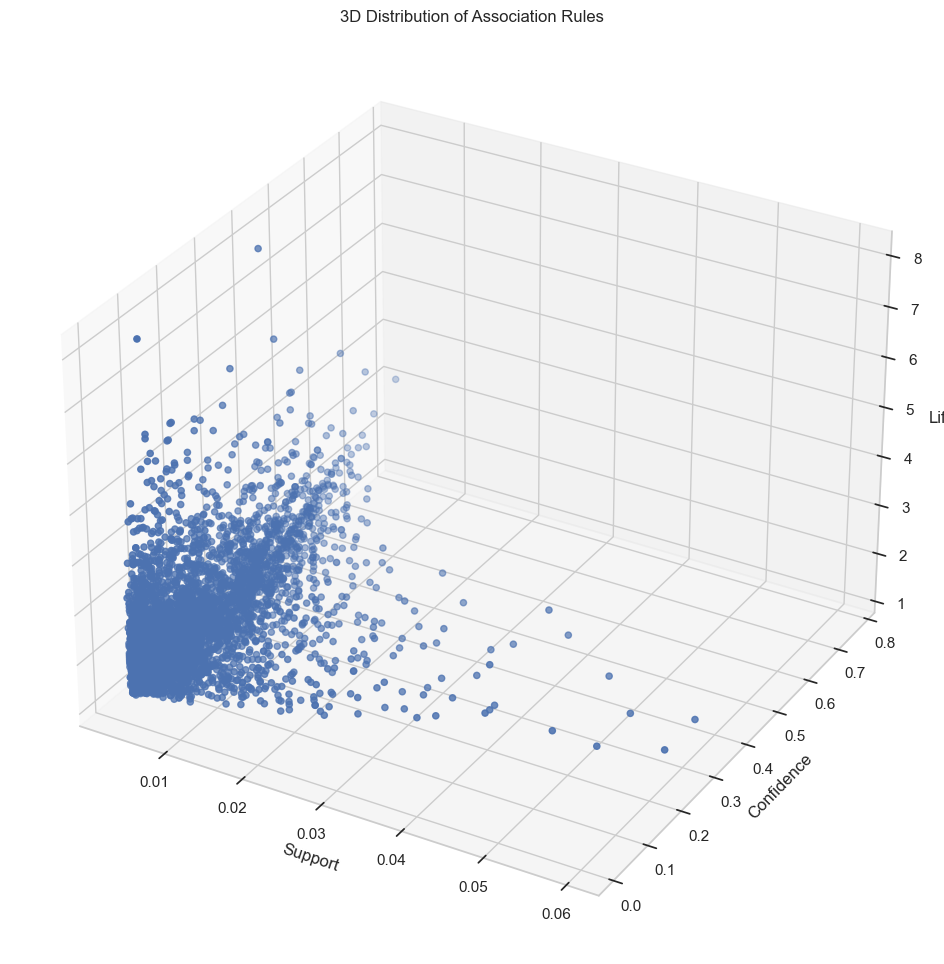

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid")
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection = '3d')


x = rules['support']
y = rules['confidence']
z = rules['lift']

ax.set_xlabel("Support")
ax.set_ylabel("Confidence")
ax.set_zlabel("Lift")

ax.scatter(x, y, z)
ax.set_title("3D Distribution of Association Rules")

plt.show()